# Pre-processing


### Remove unwanted lines for better character-level training data

In [15]:
# run only once
# with open('poem_data/untitled.txt', 'r') as f:
#     lines = f.readlines()

# with open('poem_data/untitled.txt', 'w') as f:
#     counter = 0
#     for i in range(len(lines)):
#         if counter >= 12:
#             if counter == 13:
#                 counter = 0
#             else:
#                 counter += 1
#             continue
#         else:
#             counter += 1
#             f.write(lines[i])

### Load data

In [26]:
import numpy as np

data = open('poem_data/shakespeare.txt', 'r').read().lower() # should be simple plain text file
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)

print(f'data has %d characters, %d unique.' % (data_size, vocab_size))

char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

print(char_to_ix)
print(ix_to_char)

data has 91841 characters, 38 unique.
{'b': 0, 'p': 1, ':': 2, 'e': 3, 'z': 4, 'y': 5, 'i': 6, ' ': 7, 'r': 8, "'": 9, 's': 10, 'c': 11, 'x': 12, 't': 13, 'k': 14, 'q': 15, 'd': 16, '.': 17, '?': 18, 'v': 19, 'm': 20, 'h': 21, '-': 22, 'w': 23, ',': 24, 'u': 25, 'o': 26, 'n': 27, '!': 28, 'j': 29, ';': 30, ')': 31, 'l': 32, 'f': 33, 'a': 34, '(': 35, '\n': 36, 'g': 37}
{0: 'b', 1: 'p', 2: ':', 3: 'e', 4: 'z', 5: 'y', 6: 'i', 7: ' ', 8: 'r', 9: "'", 10: 's', 11: 'c', 12: 'x', 13: 't', 14: 'k', 15: 'q', 16: 'd', 17: '.', 18: '?', 19: 'v', 20: 'm', 21: 'h', 22: '-', 23: 'w', 24: ',', 25: 'u', 26: 'o', 27: 'n', 28: '!', 29: 'j', 30: ';', 31: ')', 32: 'l', 33: 'f', 34: 'a', 35: '(', 36: '\n', 37: 'g'}


### Tokenization

In [28]:
with open('poem_data/shakespeare.txt', 'r') as f:
    lines = f.readlines()
lines_lower = [line.lower() for line in lines]

tokens = [list(line) for line in lines_lower]
for i in range(3):
    print(tokens[i])

['f', 'r', 'o', 'm', ' ', 'f', 'a', 'i', 'r', 'e', 's', 't', ' ', 'c', 'r', 'e', 'a', 't', 'u', 'r', 'e', 's', ' ', 'w', 'e', ' ', 'd', 'e', 's', 'i', 'r', 'e', ' ', 'i', 'n', 'c', 'r', 'e', 'a', 's', 'e', ',', '\n']
['t', 'h', 'a', 't', ' ', 't', 'h', 'e', 'r', 'e', 'b', 'y', ' ', 'b', 'e', 'a', 'u', 't', 'y', "'", 's', ' ', 'r', 'o', 's', 'e', ' ', 'm', 'i', 'g', 'h', 't', ' ', 'n', 'e', 'v', 'e', 'r', ' ', 'd', 'i', 'e', ',', '\n']
['b', 'u', 't', ' ', 'a', 's', ' ', 't', 'h', 'e', ' ', 'r', 'i', 'p', 'e', 'r', ' ', 's', 'h', 'o', 'u', 'l', 'd', ' ', 'b', 'y', ' ', 't', 'i', 'm', 'e', ' ', 'd', 'e', 'c', 'e', 'a', 's', 'e', ',', '\n']


### Generate Statistics

Counter({' ': 15628, 'e': 9030, 't': 7024, 'o': 5543, 'h': 4929, 's': 4850, 'a': 4803, 'i': 4542, 'n': 4397, 'r': 4089, 'l': 3008, 'd': 2695, 'u': 2260, '\n': 2097, 'm': 2047, 'y': 1934, 'w': 1839, ',': 1821, 'f': 1620, 'g': 1330, 'c': 1301, 'b': 1207, 'p': 985, 'v': 898, 'k': 537, '.': 396, "'": 371, ':': 158, '?': 89, '-': 79, 'j': 67, 'x': 59, 'q': 51, '(': 43, ')': 43, ';': 29, '!': 22, 'z': 20})


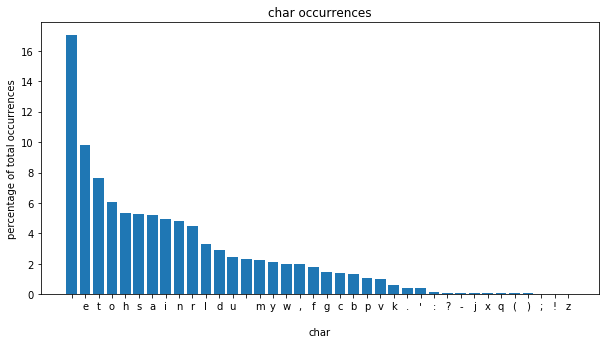

In [58]:
from collections import Counter
import matplotlib.pyplot as plt

# count how many times each character appears in the dataset
count = Counter(data)
print(count)

count = {k: (v / data_size) * 100 for k, v in count.items()}
count = sorted(count.items(), key=lambda x: x[1], reverse=True)

fig = plt.figure(figsize = (10, 5))
plt.bar([x[0] for x in count], [x[1] for x in count])

plt.xlabel("char")
plt.ylabel("percentage of total occurrences")
plt.title("char occurrences")
plt.show()